# Equations to derive leaf energy balance components from wind tunnel measurements and compare against leaf model</h1>



In [1]:
%%capture storage
# The above redirects all output of the below commands to the variable 'storage' instead of displaying it.
# It can be viewed by typing: 'storage()'
# Setting up worksheet and importing equations from other worksheets
load('temp/Worksheet_setup.sage')
load_session('temp/leaf_enbalance_eqs.sobj')

In [2]:
# Energy balance as a function of T_l and only input variables
eqenbalTl1 = (eq_Rs_enbal - R_s).rhs().subs(eq_El, eq_Hl, eq_Rll).subs(eq_Elmol).subs(eq_Cwl, eq_gtw).subs(eq_gbw_hc, eq_Pwl).subs(eq_hc, eq_rhoa_Pwa_Ta).subs(eq_Nu_forced_all, eq_Le).subs(eq_Re, eq_Dva, eq_ka).subs(eq_alphaa, eq_nua).subs(eq_PN2, eq_PO2)
eqenbalTl1.subs(cdict).args()

(C_wa, L_l, P_a, P_wa, R_s, Re_c, T_a, T_l, T_w, a_s, g_sw, v_w)

In [3]:
# Energy balance as a function of T_l and variables that are independent of leaf temperature
eqenbalTl = (eq_Rs_enbal - R_s).rhs().subs(eq_El, eq_Hl, eq_Rll).subs(eq_Elmol).subs(eq_Cwl).subs(eq_Pwl)
eqenbalTl.subs(cdict).args()

(C_wa, R_s, T_a, T_l, T_w, g_tw, h_c)

In [4]:
vdict = cdict.copy()
vdict[a_s] = 1.0    # one sided stomata
vdict[g_sw] = 0.01    
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 1
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
#vdict[L_A] = vdict[L_l]^2
vdict[Re_c] = 3000
vdict[R_s] = 600
#vdict[Q_in] = 0
vdict[v_w] = 1

vdict[C_wa] = eq_Cwl.rhs()(P_wl = P_wa, T_l = T_a).subs(vdict)
vdict[nu_a] = eq_nua.rhs().subs(vdict)
vdict[Re] = eq_Re.rhs().subs(vdict)
vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
vdict[k_a] = eq_ka.rhs().subs(vdict)
vdict[h_c] = eq_hc.rhs().subs(vdict)
vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
vdict[D_va] = eq_Dva.rhs().subs(vdict)
vdict[Le] =  eq_Le.rhs().subs(vdict)
vdict[P_N2] = eq_PN2.rhs().subs(vdict)
vdict[P_O2] = eq_PO2.rhs().subs(vdict)
vdict[rho_a] =  eq_rhoa_Pwa_Ta.rhs().subs(vdict)
vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
vdict[g_tw] =  eq_gtw.rhs().subs(vdict)


print eqenbalTl.subs(vdict).args()
vdict[T_l] = find_root(eqenbalTl.subs(vdict), 273, 373)
vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
vdict[C_wl] = eq_Cwl.rhs().subs(vdict)
vdict[E_lmol] = eq_Elmol.rhs().subs(vdict)
eq_El.subs(vdict)

(T_l,)


E_l == 185.424519010310

In [5]:
def fun_SS(vdict1):
    '''
    Steady-state T_l, R_ll, H_l and E_l under forced conditions.
    Parameters are given in a dictionary (vdict) with the following entries:
    a_s, a_sh, L_l, P_a, P_wa, R_s, Re_c, T_a, g_sw, v_w
    ''' 
    vdict = vdict1.copy()

    vdict[C_wa] = eq_Cwl.rhs()(P_wl = P_wa, T_l = T_a).subs(vdict)
    vdict[nu_a] = eq_nua.rhs().subs(vdict)
    vdict[Re] = eq_Re.rhs().subs(vdict)
    vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
    vdict[k_a] = eq_ka.rhs().subs(vdict)
    vdict[h_c] = eq_hc.rhs().subs(vdict)
    vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
    vdict[D_va] = eq_Dva.rhs().subs(vdict)
    vdict[Le] =  eq_Le.rhs().subs(vdict)
    vdict[P_N2] = eq_PN2.rhs().subs(vdict)
    vdict[P_O2] = eq_PO2.rhs().subs(vdict)
    vdict[rho_a] =  eq_rhoa_Pwa_Ta.rhs().subs(vdict)
    vdict[g_bw] = eq_gbw_hc.rhs().subs(vdict)
    vdict[g_tw] =  eq_gtw.rhs().subs(vdict)
    
    vdict[T_l] = find_root(eqenbalTl.subs(vdict), 273, 373)
    vdict[P_wl] = eq_Pwl.rhs().subs(vdict)
    vdict[C_wl] = eq_Cwl.rhs().subs(vdict)
    vdict[E_lmol] = eq_Elmol.rhs().subs(vdict)
    vdict[E_l] = eq_El.rhs().subs(vdict)
    vdict[R_ll] = eq_Rll.rhs().subs(vdict)
    vdict[H_l] = eq_Hl.rhs().subs(vdict)

    
    # Test for steady state
    if n((E_l + H_l + R_ll - R_s).subs(vdict))>1.:
        return 'error in energy balance: El + Hl + Rll - R_s = ' + str(n((E_l + H_l + R_ll - R_s).subs(vdict))) 
    return vdict

In [6]:
# Test
vdict = cdict.copy()
vdict[a_s] = 1.0    # one sided stomata
vdict[g_sw] = 0.01    
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 0.5
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
#vdict[L_A] = vdict[L_l]^2
vdict[Re_c] = 3000
vdict[R_s] = 0.
#vdict[Q_in] = 0
vdict[v_w] = 1

dict_print(fun_SS(vdict))

C_wa            0.647207041733317
C_wl            1.12479267904924
D_va            0.0000248765000000000
E_l             142.258640360009
E_lmol          0.00322581950929725
H_l             -112.722448184651
L_l             0.0300000000000000
Le              0.888469037042992
M_N2            0.0280000000000000
M_O2            0.0320000000000000
M_w             0.0180000000000000
Nu              26.1863624980041
P_N2            78777.7859000930
P_O2            20940.9304291387
P_a             101325         
P_wa            1606.28367076831
P_wl            2768.40610422239
Pr              0.710000000000000
R_ll            -29.5361921753575
R_mol           8.31447200000000
R_s             0.000000000000000
Re              1927.40122068744
Re_c            3000           
T_a             298.500000000000
T_l             296.021082253  
T_w             298.500000000000
a_s             1.00000000000000
a_sh            2              
alpha_a         0.0000221020000000000
c_pa            1010

## Gas and energy exchange in a leaf chamber
Calculations based on leaf_capacitance_steady_state1. However, following the LI-6400XT user manual (Eq. 17-3), we replace the air temperature by wall temperature in the calculation of the net longwave balance of the leaf, as wall temperature can be measured in the chamber. Following the same equation, we also add the leaf thermal emissivity of 0.95 (P. 17-3). 
**Note that in order to measure sensible heat flux from the leaf, wall temperature must be equal to air temperature!**

In [7]:
width = 0.05
height = 0.03
volume = 310/(100^3)
print 'Volume = ' + str((volume*1000).n()) + ' l'

print 'min flow rate for flushing = ' + str((volume*3/100^3/60).n()) + ' m3/s'
print 'min flow rate for flushing = ' + str((volume*3*1000).n()) + ' l/min'
print 'flow rate for 1 m/s direct wind = ' + str(width*height*1) + ' m3/s'
print 'flow rate for 1 m/s direct wind = ' + str(width*height*1*1000*60) + ' l/m'
print 'flow rate for 5 m/s direct wind = ' + str(width*height*5) + ' m3/s'
print 'flow rate for 5 m/s direct wind = ' + str(width*height*5*1000*60) + ' l/m'

Volume = 0.310000000000000 l
min flow rate for flushing = 1.55000000000000e-11 m3/s
min flow rate for flushing = 0.930000000000000 l/min
flow rate for 1 m/s direct wind = 0.00150000000000000 m3/s
flow rate for 1 m/s direct wind = 90.0000000000000 l/m
flow rate for 5 m/s direct wind = 0.00750000000000000 m3/s
flow rate for 5 m/s direct wind = 450.000000000000 l/m


In [8]:
width = 0.05
height = 0.03
volume = 400/(100^3)
print 'Volume = ' + str((volume*1000).n()) + ' l'

print 'min flow rate for flushing = ' + str((volume*3/100^3/60).n()) + ' m3/s'
print 'min flow rate for flushing = ' + str((volume*3*1000).n()) + ' l/min'
print 'flow rate for 1 m/s direct wind = ' + str(width*height*1) + ' m3/s'
print 'flow rate for 1 m/s direct wind = ' + str(width*height*1*1000*60) + ' l/m'

Volume = 0.400000000000000 l
min flow rate for flushing = 2.00000000000000e-11 m3/s
min flow rate for flushing = 1.20000000000000 l/min
flow rate for 1 m/s direct wind = 0.00150000000000000 m3/s
flow rate for 1 m/s direct wind = 90.0000000000000 l/m


<h2>Chamber insulation material</h2>

In [9]:
var2('c_pi', 'Heat capacity of insulation material', joule/kilogram/kelvin, latexname='c_{pi}')
var2('lambda_i', 'Heat conductivity of insulation material', joule/second/meter/kelvin)
var2('rho_i', 'Density of insulation material', kilogram/meter^3)
var2('L_i', 'Thickness of insulation material', meter)
var2('A_i', 'Conducting area of insulation material', meter^2)
var2('Q_i', 'Heat conduction through insulation material', joule/second)
var2('dT_i', 'Temperature increment of insulation material', kelvin)

dT_i

In [10]:
assumptions(c_pi)

[c_pi is real]

In [11]:
eq_Qi = Q_i == dT_i*lambda_i*A_i/L_i
units_check(eq_Qi)

Q_i == A_i*dT_i*lambda_i/L_i

kilogram*meter^2/second^3 == kilogram*meter^2/second^3

In [12]:
eq_Li = solve(eq_Qi, L_i)[0]
units_check(eq_Li)

L_i == A_i*dT_i*lambda_i/Q_i

meter == meter

In [13]:
# The amount of heat absorbed by the insulation material per unit area to increase the wall temperature by the same amount as dT_i for given heat flux Q_i
units_check(c_pi*rho_i*dT_i*L_i)

L_i*c_pi*dT_i*rho_i

kilogram/second^2

In [14]:
(c_pi*rho_i*dT_i*L_i).subs(eq_Li)

A_i*c_pi*dT_i^2*lambda_i*rho_i/Q_i

In [15]:
# From http://www.sager.ch/default.aspx?navid=25, PIR
vdict = {}
vdict[lambda_i] = 0.022
vdict[c_pi] = 1400
vdict[rho_i] = 30
(c_pi*rho_i*dT_i*L_i).subs(eq_Li).subs(vdict)(A_i = 0.3, dT_i = 0.1, Q_i = 0.01)

277.200000000000

In [16]:
# From http://www.sager.ch/default.aspx?navid=25, Sagex 15
vdict = {}
vdict[lambda_i] = 0.038
vdict[c_pi] = 1400
vdict[rho_i] = 15
(c_pi*rho_i*dT_i*L_i).subs(eq_Li).subs(vdict)(A_i = 0.3, dT_i = 0.1, Q_i = 0.01)

239.400000000000

In [17]:
units_check(lambda_i*A_i*dT_i*L_i)

A_i*L_i*dT_i*lambda_i

kilogram*meter^4/second^3

In [18]:
# Assuming a 30x10x5 cm chamber, how thick would the insulation have to be in order to lose 
# less than 0.01 W heat for 0.1 K dT_i?
eq_Li(A_i = 0.3*0.1*2 + 0.3*0.05*2, dT_i = 0.1, Q_i = 0.01).subs(vdict)

L_i == 0.0342000000000000

In [19]:
# From http://www.sager.ch/default.aspx?navid=25, Sagex 30
vdict = {}
vdict[lambda_i] = 0.033
vdict[c_pi] = 1400
vdict[rho_i] = 30
(c_pi*rho_i*dT_i*L_i).subs(eq_Li).subs(vdict)(A_i = 0.3, dT_i = 0.1, Q_i = 0.01)

415.800000000000

## Leaf radiation balance

In [20]:
# Additional variables
var2('alpha_l', 'Leaf albedo, fraction of shortwave radiation reflected by the leaf', watt/watt)
var2('R_d', 'Downwelling global radiation', joule/second/meter^2)
var2('R_la', 'Longwave radiation absorbed by leaf', joule/second/meter^2, latexname='R_{la}')
var2('R_ld', 'Downwards emitted/reflected global radiation from leaf', joule/second/meter^2, latexname='R_{ld}')
var2('R_lu', 'Upwards emitted/reflected global radiation from leaf', joule/second/meter^2, latexname='R_{lu}')
var2('R_u', 'Upwelling global radiation', joule/second/meter^2)
var2('S_a', 'Radiation sensor above leaf reading', joule/second/meter^2)
var2('S_b', 'Radiation sensor below leaf reading', joule/second/meter^2)
var2('S_s', 'Radiation sensor beside leaf reading', joule/second/meter^2)

S_s

### Measuring radiative exchange

<p>The leaf is exposed to downwelling radiation ($R_d$) originating from shortwave irradiance entering through the glass window plus the longwave irradiance transmitted througha and emitted by the glass window, plus the upwelling radiation ($R_u$) emitted by the bottom glass window.</p>
<p>The leaf itself reflects some of the radiation in both direction and emits its own black body longwave radiation. The sum of refelcted and emitted radiation away from the leaf is denoted as $R_{lu}$ and $R_{ld}$ for upward and downwards respectively. We have three net radiation sensors in place, one above the leaf measuring $S_a$, one below the leaf measureing $S_b$ and one at the same level beside the leaf measureing $S_s$. These sensor measure:</p>
<p><img style="float: right;" src="figures/Leaf_radbalance.png" alt="" width="400" height="300" /></p>
<p>$S_a = R_d - R_{lu}$</p>
<p>$S_b = R_{ld} - R_u$</p>
<p>$S_s = R_d - R_u$</p>
<p>This leaves us with 3 equations with 4 unknows, so we either have to assume that $R_{lu} = R_{ld}$, assuming that both sides of the leaf have the same temperature or $R_u = 0$ to solve the algebraic problem. In daylight, $R_d >> R_u$, so this assumption should not lead to a big bias, however this would imply that $S_b = R_{ld}$, which is certainly incorrect.</p>
<p>Unfortunately, the assumption $R_{lu} = R_{ld}$ does not help solve the problem as it just implies that $S_s = S_a + S_b$:</p>

In [21]:
eq_Rs_Rd = R_s == (1-alpha_l)*R_d
eq_Sa = S_a == R_d - R_lu
eq_Sb = S_b == R_ld - R_u
eq_Ss = S_s == R_d - R_u

In [22]:
# Assuming R_lu = R_ld
eq_assRldRlu = R_ld == R_lu
solve([eq_Sa, eq_Sb.subs(eq_assRldRlu), eq_Ss], R_d, R_lu, R_u)

[]

In [23]:
# More specifically,
eq1 = solve(eq_Sa, R_d)[0]
eq2 = solve(eq_Sb, R_ld)[0].subs(eq_assRldRlu)
eq3 = solve(eq_Ss, R_u)[0] 
solve(eq1.subs(eq2).subs(eq3), S_s)

[S_s == S_a + S_b]

In [24]:
# Assuming that R_u = 0
eq_assRu0 = R_u == 0
soln = solve([eq_Sa, eq_Sb, eq_Ss, eq_assRu0], R_d, R_lu, R_ld, R_u)
print soln

[
[R_d == S_s, R_lu == -S_a + S_s, R_ld == S_b, R_u == 0]
]


In [25]:
#eq_Rd = soln[0][0]
#eq_Rlu = soln[0][1]
#eq_Rld = soln[0][2]
#eq_Rlu

<p>However, what we can do in any case is to quantify the net radiative energy absorbed by the leaf as</p>
<p>$\alpha_l R_s - R_{ll} = S_a - S_b$:</p>

In [26]:
# Leaf radiation balance
eq_Rs_Rll = R_s - R_ll == R_d + R_u - R_lu - R_ld
eq_Rbalance = R_s - R_ll == S_a - S_b

In [27]:
solve([eq_Sa, eq_Sb, eq_Ss, R_d + R_u - R_lu - R_ld == S_a - S_b], R_d, R_lu, R_ld, R_u)

[[R_d == S_s + r1, R_lu == -S_a + S_s + r1, R_ld == S_b + r1, R_u == r1]]

## Leaf water vapour exchange and energy balace
The leaf water vapour exchange and energy balance equations were imported from [leaf_enbalance_eqs](Leaf_enbalance_eqs.ipynb). Here we will use an additional equation to estimate the thickness of the leaf boundary layer and get a feeling for the minimum distance between leaf and sensors to avoid interference with the boundary layer conditions.

In [28]:
# Blasius solution for BL thickness (http://en.wikipedia.org/wiki/Boundary-layer_thickness)
var2('B_l', 'Boundary layer thickness', meter)
vdict = cdict.copy()
Ta = 300
vdict[T_a] = Ta
vdict[T_l] = Ta
vdict[L_l] = 0.15
vdict[v_w] = 0.5
vdict[Re_c] = 3000
vdict[a_s] = 1
vdict[P_a] = 101325
vdict[P_wa] = 0
eq_Bl = B_l == 4.91*sqrt(nu_a*L_l/v_w)
print eq_Bl.subs(eq_nua).subs(vdict)
eq_gbw_hc.subs(eq_hc).subs(eq_Nu_forced_all).subs(eq_Re).subs(eq_rhoa).subs(eq_Le).subs(eq_Dva).subs(eq_alphaa, eq_nua, eq_ka).subs(vdict)

B_l == 0.0106559443973775


g_bw == 0.00626665953544431

In [29]:
vdict[L_l] = 0.03
vdict[v_w] = 8
print eq_Bl.subs(eq_nua).subs(vdict)
eq_gbw_hc.subs(eq_hc).subs(eq_Nu_forced_all).subs(eq_Re).subs(eq_rhoa).subs(eq_Le).subs(eq_Dva).subs(eq_alphaa, eq_nua, eq_ka).subs(vdict)

B_l == 0.00119137080184970


g_bw == 0.0618819100593627

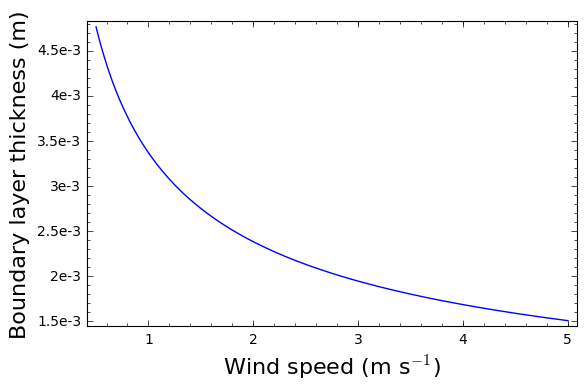

In [30]:
# How does B_l scale with wind speed?
vdict[v_w] = v_w
P = plot(eq_Bl.rhs().subs(eq_nua).subs(vdict), (v_w, 0.5,5))
P.axes_labels(['Wind speed (m s$^{-1}$)', 'Boundary layer thickness (m)'])
P

In [31]:
# Maximum sensible heat flux of a 3x3 cm leaf irradiated by 600 W/m2
600*0.03^2

0.540000000000000

<h1>Chamber mass and energy balance</h1>
<p>Usually, we know the volumetric inflow into the chamber, so to convert to molar inflow (mol s$^{-1}$), we will use the ideal gas law: $P_a V_c = n R_{mol} T_{in}$, where $n$ is the amount of matter in the chamber (mol). To convert from a volume to a flow rate, we replace $V_c$ by $F_{in,v}$. Note that partial pressures of dry air and vapour are additive, such that</p>
<p>$P_a = P_w + P_d$</p>
<p>However, the volumes are not additive, meaning that:</p>
<p>$P_d V_a = n_d R_{mol} T_{a}$</p>
<p>$(P_a - P_d) V_a = n_a R_{mol} T_{a}$</p>
<p>i.e. we use the same volume ($V_a$) for both the vapour and the dry air. This is because both the vapour and the dry air are well mixed and occupy the same total volume. Their different amounts are expressed in their partial pressures. If we wanted to calculate the partial volumes they would take up in isolation from each other, we would need to specify at which pressure this volume is taken up and if we used the same pressure for both (e.g. $P_a$), we would obtain a volume fraction for water vapour equivalent to its partial pressure fraction in the former case.</p>
<p>Therefore, we will distinguish the molar flow rates of water vapour ($F_{in,mol,v}$) and dry air ($F_{in,mol,a}$) but they share a common volumetric flow rate ($F_{in,v}$).</p>

In [32]:
var2('W_c', 'Chamber width', meter)
var2('L_c', 'Chamber length', meter)
var2('H_c', 'Chamber height', meter)
var2('V_c', 'Chamber volume', meter^3)
var2('n_c', 'molar mass of gas in chamber', mole)
var2('F_in_v', 'Volumetric flow rate into chamber', meter^3/second, latexname='F_{in,v}')
var2('F_in_mola', 'Molar flow rate of dry air into chamber', mole/second, latexname='F_{in,mol,a}')
var2('F_in_molw', 'Molar flow rate of water vapour into chamber', mole/second, latexname='F_{in,mol,w}')
var2('F_out_mola', 'Molar flow rate of dry air out of chamber', mole/second, latexname='F_{out,mol,a}')
var2('F_out_molw', 'Molar flow rate of water vapour out of chamber', mole/second, latexname='F_{out,mol,w}')
var2('F_out_v', 'Volumetric flow rate out of chamber', meter^3/second, latexname='F_{out,v}')
var2('T_d', 'Dew point temperature of incoming air', kelvin)
var2('T_in', 'Temperature of incoming air', kelvin, latexname='T_{in}')
var2('T_out', 'Temperature of outgoing air (= chamber T_a)', kelvin, latexname='T_{out}')
var2('T_room', 'Lab air temperature', kelvin, latexname='T_{room}')
var2('P_w_in', 'Vapour pressure of incoming air', pascal, latexname='P_{w,in}')
var2('P_w_out', 'Vapour pressure of outgoing air', pascal, latexname='P_{w,out}')
var2('R_H_in', 'Relative humidity of incoming air', latexname='R_{H,in}')
var2('L_A', 'Leaf area', meter^2)

L_A

In [33]:
eq_V_c = fun_eq(V_c == W_c*L_c*H_c)
eq_F_in_mola = fun_eq(F_in_mola == (P_a - P_w_in)*F_in_v/(R_mol*T_in))
eq_F_in_molw = fun_eq(F_in_molw == (P_w_in)*F_in_v/(R_mol*T_in))
eq_F_out_mola = fun_eq(F_out_mola == (P_a - P_w_out)*F_out_v/(R_mol*T_out))
eq_F_out_molw = fun_eq(F_out_molw == (P_w_out)*F_out_v/(R_mol*T_out))
eq_F_out_v = fun_eq(F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a)

V_c == H_c*L_c*W_c

meter^3 == meter^3


F_in_mola == F_in_v*(P_a - P_w_in)/(R_mol*T_in)

mole/second == mole/second


F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

mole/second == mole/second


F_out_mola == F_out_v*(P_a - P_w_out)/(R_mol*T_out)

mole/second == mole/second


F_out_molw == F_out_v*P_w_out/(R_mol*T_out)

mole/second == mole/second


F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

meter^3/second == meter^3/second


<p>At steady state, $F_{out,mola} = F_{in,mola}$ and $F_{out,molw} = F_{in,molw} + E_{l,mol} L_A$. In the presence of evaporation, we can simply add Elmol to get F_out_v as a function of F_in_v</p>
<p>Assuming that the pressure inside the chamber is constant and equal to the pressure outside, we compute the change in volumetric outflow due to a change in temperature and due to the input of water vapour by transpiration as:</p>

In [34]:
eq_Foutv_Finv_Tout = eq_F_out_v.subs(F_out_mola = F_in_mola, F_out_molw = F_in_molw + E_lmol*L_A).subs(eq_F_in_mola, eq_F_in_molw).simplify_full()
units_check(eq_Foutv_Finv_Tout)

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

meter^3/second == meter^3/second

In [35]:
eq_Foutv_Finv_Tout

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

In [36]:
# Other way, using molar in and outflow
eq_Foutmolw_Finmolw_Elmol = F_out_molw == (F_in_molw + E_lmol*L_A)
units_check(eq_Foutmolw_Finmolw_Elmol)

F_out_molw == E_lmol*L_A + F_in_molw

mole/second == mole/second

<h2>Change in air temperature</h2>
<p>See also <a href="http://www.engineeringtoolbox.com/mixing-humid-air-d_694.html">http://www.engineeringtoolbox.com/mixing-humid-air-d_694.html</a> and <a href="http://www.engineeringtoolbox.com/enthalpy-moist-air-d_683.html">http://www.engineeringtoolbox.com/enthalpy-moist-air-d_683.html</a> for reference.</p>
<p>We will assume that the air entering the chamber mixes with the air inside the chamber at constant pressure, i.e. the volume of the mixed air becomes the chamber volume plus the volume of the air that entered. The temperature of the mixed air is then the sum of their enthalpies plus the heat added by the fan and by sensible heaflux, divided by the sum of their heat capacities. The addition of water vapour through evaporation by itself should not affect the air temperature, but the volume of the air.</p>
<p> </p>
<p>Alternatively, we could assume that a given amount of air is added to a constant volume, leading to an increase in pressure. Addition of water vapour would lead to an additional increase in pressure. In addition, addition/removal of heat by sensible heat flux and the chamber fan would affect both temperature and pressure.To calculate both temperature and pressure, we need to track the internal energy in addition to the mole number. According to Eq. 6.1.3 in Kondepudi & Prigogine (2006), the internal energy of an ideal gas is given by (see also Eq. 2.2.15 in Kondepuid & Prigogine):</p>
<p>$U = N(U_0 + C_v T)$</p>
<p>where</p>
<p>$U_0 = M c^2$</p>
<p>The relation between molar heat capacities at constant pressure and volume is given as :</p>
<p>$C_v = C_p - R_{mol}$</p>
<p>Any heat exchanged by sensible heat flux, across the walls and the fan can be added to total $U$, and then knowledge about total $C_v$ will let us calculate air temperature inside the chamber. After that, we can use the ideal gas law to calculate volume or pressure, depending in which of those we fixed:</p>
<p>$P V = n R T$</p>
<p> </p>
<p>The difference in water vapour pressure and temperature between the incoming and outgoing air is a function of the latent and sensible heat flux, as well as the flow rate. The heat fluxes associated with the incoming and outgoing air are $T_{in} (c_{pa} F_{in,mola} M_{air} + c_{pv} F_{in,molw} M_{w})$ and $T_{out} (c_{pa} F_{out,mola} M_{air} + c_{pv} F_{out,molw} M_{w})$ respectively. The difference between the two plus any additional heat sources/sinks ($Q_{in}$) equals the sensible heat flux at constant air temperature (steady state).</p>

In [37]:
units_check(eq_F_out_v)

F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

meter^3/second == meter^3/second

In [38]:
var2('M_air', 'Molar mass of air (kg mol-1)', kilogram/mole, value = 0.02897, latexname='M_{air}')  # http://www.engineeringtoolbox.com/molecular-mass-air-d_679.html
var2('c_pv', 'Specific heat of water vapour at 300 K', joule/kilogram/kelvin, latexname = 'c_{pv}', value = 1864) # source: http://www.engineeringtoolbox.com/water-vapor-d_979.html
var2('Q_in', 'Internal heat sources, such as fan', joule/second, latexname = 'Q_{in}')
eq_chamber_energy_balance = 0 == H_l*L_A + Q_in + T_in*(c_pa*M_air*F_in_mola + c_pv*M_w*F_in_molw) - (T_out*(c_pa*M_air*F_out_mola + c_pv*M_w*F_out_molw)); show(eq_chamber_energy_balance)
eq_Hl_enbal = solve(eq_chamber_energy_balance.subs(F_out_mola == F_in_mola, F_out_molw == F_in_molw + L_A*E_lmol), H_l)[0].expand()
print units_check(eq_Hl_enbal)

0 == H_l*L_A + (F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)*T_in - (F_out_mola*M_air*c_pa + F_out_molw*M_w*c_pv)*T_out + Q_in

H_l == E_lmol*M_w*T_out*c_pv - F_in_mola*M_air*T_in*c_pa/L_A + F_in_mola*M_air*T_out*c_pa/L_A - F_in_molw*M_w*T_in*c_pv/L_A + F_in_molw*M_w*T_out*c_pv/L_A - Q_in/L_A

kilogram/second^3 == kilogram/second^3


In [39]:
soln = solve(eq_chamber_energy_balance.subs(eq_Foutmolw_Finmolw_Elmol, F_out_mola == F_in_mola), T_out)
print soln
eq_Tout_Finmol_Tin = soln[0]
units_check(eq_Tout_Finmol_Tin).simplify_full().convert().simplify_full()

[
T_out == (F_in_mola*M_air*T_in*c_pa + F_in_molw*M_w*T_in*c_pv + H_l*L_A + Q_in)/(E_lmol*L_A*M_w*c_pv + F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)
]


T_out == (F_in_mola*M_air*T_in*c_pa + F_in_molw*M_w*T_in*c_pv + H_l*L_A + Q_in)/(E_lmol*L_A*M_w*c_pv + F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)

kelvin == kelvin

In [40]:
eq_Tout_Finv_Tin = eq_Tout_Finmol_Tin.subs(eq_F_in_mola, eq_F_in_molw).simplify_full()
print eq_Tout_Finv_Tin
show(eq_Tout_Finv_Tin)
units_check(eq_Tout_Finv_Tin).simplify_full().convert()

T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)


T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

kelvin == kelvin

<p>The molar outflux of dry air equals the molar influx of dry air, while the molar outflux of water vapour equals the molar influx plus the evaporation rate. The sum of both can be used to obtain the volumetric outflow:</p>

In [41]:
# F_out_v as function of F_inv and T_in
eq1 = (eq_F_out_molw + eq_F_out_mola).simplify_full(); show(eq1)
eq2 = eq1.subs(F_out_mola == F_in_mola, eq_Foutmolw_Finmolw_Elmol).subs(eq_F_in_mola, eq_F_in_molw); show(eq2)
soln = solve(eq2,F_out_v); print soln
eq_Foutv_Finv = soln[0]; show(eq_Foutv_Finv)
units_check(eq_Foutv_Finv)

F_out_mola + F_out_molw == F_out_v*P_a/(R_mol*T_out)

E_lmol*L_A + F_in_v*(P_a - P_w_in)/(R_mol*T_in) + F_in_v*P_w_in/(R_mol*T_in) == F_out_v*P_a/(R_mol*T_out)

[
F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)
]


F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

meter^3/second == meter^3/second

In [42]:
eq_Foutv_Finv

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

In [43]:
eq_Foutv_Finv_Tout

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

In [44]:
eq_Tout_Finmol_Tin

T_out == (F_in_mola*M_air*T_in*c_pa + F_in_molw*M_w*T_in*c_pv + H_l*L_A + Q_in)/(E_lmol*L_A*M_w*c_pv + F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)

In [45]:
# Finding the T_in that would balance sensible heat release by the plate for given F_inv
assume(F_in_v > 0)
assume(F_out_v > 0)
assume(E_lmol >=0)
show(eq_chamber_energy_balance)
soln = solve(eq_chamber_energy_balance.subs(F_out_mola == F_in_mola).subs(eq_Foutmolw_Finmolw_Elmol).subs(eq_F_in_mola, eq_F_in_molw), T_in)
print soln
eq_T_in_ss = soln[0]
show(eq_T_in_ss)

0 == H_l*L_A + (F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)*T_in - (F_out_mola*M_air*c_pa + F_out_molw*M_w*c_pv)*T_out + Q_in

[
T_in == (F_in_v*M_w*P_w_in*T_out*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out*c_pa)/(F_in_v*M_w*P_w_in*c_pv - (E_lmol*M_w*R_mol*T_out*c_pv - H_l*R_mol)*L_A + Q_in*R_mol + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)
]


T_in == (F_in_v*M_w*P_w_in*T_out*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out*c_pa)/(F_in_v*M_w*P_w_in*c_pv - (E_lmol*M_w*R_mol*T_out*c_pv - H_l*R_mol)*L_A + Q_in*R_mol + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

In [46]:
# Calculating Q_in from T_in, F_in_v and T_out
soln = solve(eq_T_in_ss,Q_in)
print soln
eq_Qin_Tin_Tout = soln[0]

[
Q_in == ((E_lmol*M_w*R_mol*T_in*T_out*c_pv - H_l*R_mol*T_in)*L_A - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(R_mol*T_in)
]


In [47]:
# Calculating H_l from T_in, F_in_v and T_out
soln = solve(eq_T_in_ss,H_l)
print soln
eq_Hl_Tin_Tout = soln[0]
eq_Hl_Tin_Tout.show()

[
H_l == (E_lmol*L_A*M_w*R_mol*T_in*T_out*c_pv - Q_in*R_mol*T_in - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(L_A*R_mol*T_in)
]


H_l == (E_lmol*L_A*M_w*R_mol*T_in*T_out*c_pv - Q_in*R_mol*T_in - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(L_A*R_mol*T_in)

In [48]:
# Calculating H_l from T_in, T_out and Fmol
soln = solve(eq_chamber_energy_balance.subs(F_out_mola == F_in_mola), H_l)
print soln
eq_Hl_Tin_Tout_Fmol = soln[0].simplify_full()
eq_Hl_Tin_Tout_Fmol.show()

[
H_l == -((F_in_mola*M_air*T_in - F_in_mola*M_air*T_out)*c_pa + (F_in_molw*M_w*T_in - F_out_molw*M_w*T_out)*c_pv + Q_in)/L_A
]


H_l == -((F_in_mola*M_air*T_in - F_in_mola*M_air*T_out)*c_pa + (F_in_molw*M_w*T_in - F_out_molw*M_w*T_out)*c_pv + Q_in)/L_A

<h2>Calculation of volumetric flow rate based on Cellkraft measurements</h2>
<p>Cellcraft uses Arden-Buck equation to convert between vapour pressure and dew point (<a href="http://en.wikipedia.org/wiki/Arden_Buck_Equation">http://en.wikipedia.org/wiki/Arden_Buck_Equation</a>).<br />The air flow rate is given by the Cellkraft humidifier in l/min, but it refers to dry air at 0 $^o$C and 101300 Pa.</p>
<p>We will use the reported dew point temperature to obtain the vapour pressure of the air coming out from the Cellkraft humidifier, then the ideal gas law to obtain the molar flow of dry air, leading to three equations with three unknowns:</p>
<p>$F_{\mathit{in}_{\mathit{mola}}} = \frac{F_{\mathit{in}_{\mathit{va}_{n}}} P_{r}}{{R_{mol}} T_{r}}$</p>
<p>$F_{\mathit{in}_{v}} = \frac{{\left(F_{\mathit{in}_{\mathit{mola}}} + F_{\mathit{in}_{\mathit{molw}}}\right)} {R_{mol}} T_{\mathit{in}}}{P_{a}}$</p>
<p>$F_{\mathit{in}_{\mathit{molw}}} = \frac{F_{\mathit{in}_{v}} P_{v_{\mathit{in}}}}{{R_{mol}} T_{\mathit{in}}}$</p>

[19.1756620432331, 35.0631107274011, 62.0367042507648, 106.473009443655, 177.667645607840, 288.831780737493, 458.305321164456, 710.999051614674, 1080.07052944457, 1608.82992645281, 2352.86266113812, 3382.34604242497, 4784.52773726516, 6666.32514525647, 9156.99713166349]


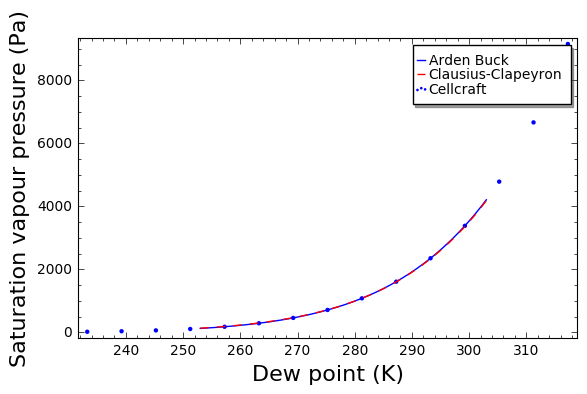

In [49]:
# Calculating vapour pressure in the incoming air from reported dew point by the Cellkraft humidifier
var2('T0', 'Freezing point in kelvin',kelvin, value = 273.15)
eq_Pwin_Tdew = P_w_in == 611.21*exp((18.678 - (T_d - T0)/234.5)*((T_d - T0)/(257.14-T0+T_d))) # c
list_Tdew = np.array(srange(-40,50,6))+273.25
list_Pwin = [eq_Pwin_Tdew.rhs()(T_d = dummy).subs(cdict) for dummy in list_Tdew]
print list_Pwin
P = plot(eq_Pwin_Tdew.rhs().subs(cdict), (T_d, 253,303), frame = True, axes = False, legend_label = 'Arden Buck')
P += plot(eq_Pwl.rhs().subs(cdict), (T_l, 253,303), color = 'red', linestyle = '--', legend_label = 'Clausius-Clapeyron')
P += list_plot(zip(list_Tdew,list_Pwin), legend_label = 'Cellcraft')
P.axes_labels(['Dew point (K)', 'Saturation vapour pressure (Pa)'])
P

In [50]:
eq_F_in_molw.show()

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

In [51]:
eq_Finv_Finmol = F_in_v == (F_in_mola + F_in_molw)*R_mol*T_in/P_a
units_check(eq_Finv_Finmol)

F_in_v == (F_in_mola + F_in_molw)*R_mol*T_in/P_a

meter^3/second == meter^3/second

In [52]:
var2('F_in_va_n', 'Volumetric inflow of dry air at 0oC and 101325 Pa', meter^3/second, latexname='F_{in,v,a,n}') 
var2('P_r', 'Reference pressure',pascal, value = 101325)
var2('T_r', 'Reference temperature', kelvin)

eq_Finmola_Finva_ref = fun_eq(F_in_mola == F_in_va_n * P_r/(R_mol*T_r))

F_in_mola == F_in_va_n*P_r/(R_mol*T_r)

mole/second == mole/second


<p>To get $F_{in,v}$ and $F_{in,mol,w}$, we will consider that:</p>
<p>$P_d = P_a - P_w$</p>
<p>$P_w F_{in,v} = F_{in,mol,w} R_{mol} T_{in}$</p>
<p>$(P_a - P_w) F_{in,v} = F_{in,mol,a} R_{mol} T_{a}$</p>

In [53]:
eq_Finmolw_Finv = F_in_molw == (P_w_in*F_in_v)/(R_mol*T_in)
print units_check(eq_Finmolw_Finv)
eq_Finv_Finmola = F_in_v == F_in_mola*R_mol*T_in/(P_a - P_w_in)
print units_check(eq_Finv_Finmola)
eq_Finmolw_Finmola_Pwa = fun_eq(eq_Finmolw_Finv.subs(eq_Finv_Finmola))
eq_Finv_Finva_ref = fun_eq(eq_Finv_Finmola.subs(eq_Finmola_Finva_ref))

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

mole/second == mole/second


F_in_v == F_in_mola*R_mol*T_in/(P_a - P_w_in)

meter^3/second == meter^3/second


F_in_molw == F_in_mola*P_w_in/(P_a - P_w_in)

mole/second == mole/second


F_in_v == F_in_va_n*P_r*T_in/((P_a - P_w_in)*T_r)

meter^3/second == meter^3/second


In [54]:
vdict = cdict.copy()
vdict[F_in_va_n] = 10e-3/60   # 10 l/min reported by Cellkraft
vdict[T_d] = 273.15 + 10    # 10oC dew point
vdict[P_a] = 101325.
vdict[T_r] = 273.15
vdict[P_w_in] = eq_Pwin_Tdew.rhs().subs(vdict)
print vdict[P_w_in]
print vdict[F_in_va_n]

vdict[T_in] = 273.15+0 
inflow0 = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 0 oC: ' + str(inflow0) + ' m3/s'

vdict[T_in] = 273.15+25  
inflow25 = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 25 oC: ' + str(inflow25) + ' m3/s'


print '25oC/0oC: ' + str(inflow25/inflow0)

vdict[T_in] = 273.15+25 
vdict[P_w_in] = 0. 
inflow25 = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 25 oC without added vapour: ' + str(inflow25) + ' m3/s'

1227.86016957787
0.000166666666666667
Volumentric flow at 0 oC: 0.000168711114309656 m3/s
Volumentric flow at 25 oC: 0.000184152365848157 m3/s
25oC/0oC: 1.09152480322167
Volumentric flow at 25 oC without added vapour: 0.000181920800536946 m3/s


<h2>Vapour pressure</h2>
<p>The water fluxes associated with the incoming and the outgoing air according to the ideal gas law are $P_{v,in} F_{in,v}/(R_{mol} T_{in})$ and $P_{v,out}  F_{out,v}/(R_{mol} T_{out})$ respectively.</p>

In [55]:
eq_Foutv_Finv_Tout.show()

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

In [56]:
eq_F_out_v.show()

F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

In [57]:
eq_F_in_mola.subs(eq_Finv_Finva_ref).show()

F_in_mola == F_in_va_n*P_r/(R_mol*T_r)

In [58]:
eq_Finv_Finva_ref.show()

F_in_v == F_in_va_n*P_r*T_in/((P_a - P_w_in)*T_r)

In [59]:
eq_F_in_molw.show()
eq_F_out_molw.show()
eq_Foutmolw_Finmolw_Elmol.show()

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

F_out_molw == F_out_v*P_w_out/(R_mol*T_out)

F_out_molw == E_lmol*L_A + F_in_molw

In [60]:
eq1 = eq_F_out_molw.rhs() == eq_Foutmolw_Finmolw_Elmol.rhs().subs(eq_F_in_molw)
eq1.show()
soln = solve(eq1, P_w_out)
eq_Pwout_Elmol = fun_eq(soln[0].subs(eq_Foutv_Finv_Tout.subs(eq_F_in_molw)).simplify_full())
units_check(eq_Pwout_Elmol)

F_out_v*P_w_out/(R_mol*T_out) == E_lmol*L_A + F_in_v*P_w_in/(R_mol*T_in)

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

kilogram/(meter*second^2) == kilogram/(meter*second^2)

<p><span style="color: #ff0000;">It is a bit surprising that steady-state $P_{w_{out}}$ does not depend on $T_{out}$.</span></p>

In [61]:
soln[0].subs(eq_Foutv_Finv_Tout.subs(eq_F_in_molw)).simplify_full().show()
soln[0].subs(eq_F_out_v).subs(F_out_mola = F_in_mola, F_out_molw = F_in_molw + E_lmol*L_A).simplify_full().show()

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + (F_in_mola + F_in_molw)*R_mol*T_in)

<p><span style="color: #ff0000;">The above are equivalent, because $F_{in,v} P_a = (F_{in,mol,a} + F_{in,mol,w}) R_{mol} T_{in}$<br /></span></p>

In [62]:
eq_Pwout_Elmol.subs(eq_Finv_Finva_ref).simplify_full().show()

P_w_out == (F_in_va_n*P_a*P_r*P_w_in + (E_lmol*P_a^2 - E_lmol*P_a*P_w_in)*L_A*R_mol*T_r)/((E_lmol*P_a - E_lmol*P_w_in)*L_A*R_mol*T_r + F_in_va_n*P_a*P_r)

In [63]:
show(soln[0])
show(eq_Foutv_Finv_Tout)
show(eq_F_in_molw)

P_w_out == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_w_in*T_out)/(F_out_v*T_in)

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

In [64]:
show(soln[0].subs(eq_Foutv_Finv_Tout.subs(eq_F_in_molw)).simplify())

P_w_out == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_w_in*T_out)*P_a/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)

In [65]:
# T_out cancels out when the above is expanded
show(soln[0].subs(eq_Foutv_Finv_Tout.subs(eq_F_in_molw)).expand())

P_w_out == E_lmol*L_A*P_a*R_mol*T_in*T_out/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out) + F_in_v*P_a*P_w_in*T_out/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)

<p>To convert from energetic to molar units, we need to divide $E_l$ by $\lambda_E M_w$:</p>

In [66]:
eq_Elmol_El = E_lmol == E_l/(lambda_E*M_w)
print units_check(eq_Elmol_El)
eq_El_Elmol = E_l == E_lmol*lambda_E*M_w

E_lmol == E_l/(M_w*lambda_E)

mole/(meter^2*second) == mole/(meter^2*second)


In [67]:
# In order to keep P_w_out = P_wa = const., we need to adjust P_w_in accordingly.
soln = solve(eq_Pwout_Elmol, P_w_in)
eq_Pwin_Elmol = soln[0].simplify_full()
show(eq_Pwin_Elmol)

P_w_in == -((E_lmol*P_a - E_lmol*P_w_out)*L_A*R_mol*T_in - F_in_v*P_a*P_w_out)/(F_in_v*P_a)

In [68]:
vdict = cdict.copy()
vdict[F_in_va_n] = 10e-3/60   # 10 l/min reported by Cellkraft
vdict[T_d] = 273.15 + 10    # 10oC dew point
vdict[P_a] = 101325.
vdict[T_r] = 273.15
vdict[P_w_in] = eq_Pwin_Tdew.rhs().subs(vdict)
print vdict[P_w_in]
print vdict[F_in_va_n]

vdict[T_in] = 273.15+0 
inflow0 = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 0 oC: ' + str(inflow0) + ' m3/s'

vdict[T_in] = 273.15+25  
inflow25 = eq_Finv_Finva_ref.rhs().subs(vdict)
vdict[F_in_v] = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 25 oC: ' + str(inflow25) + ' m3/s'


print '25oC/0oC: ' + str(inflow25/inflow0)

vdict[T_in] = 273.15+25 
vdict[P_w_in] = 0. 
inflow25 = eq_Finv_Finva_ref.rhs().subs(vdict)
print 'Volumentric flow at 25 oC without added vapour: ' + str(inflow25) + ' m3/s'

vdict[E_l] = 100. # assuming 100 W/m2 El
vdict[L_A] = 0.03^2
vdict[E_lmol] = eq_Elmol_El.rhs().subs(vdict)
vdict[T_out] = 273+20. # Assuming 20oC T in chamber

eq_Pwout_Elmol.subs(vdict)

1227.86016957787
0.000166666666666667
Volumentric flow at 0 oC: 0.000168711114309656 m3/s
Volumentric flow at 25 oC: 0.000184152365848157 m3/s
25oC/0oC: 1.09152480322167
Volumentric flow at 25 oC without added vapour: 0.000181920800536946 m3/s


P_w_out == 27.4649220798963

<h2>Net radiation measurement</h2>
<p>According to Incropera_fundamentals, Table 13.1, the view factor (absorbed fraction of radiation emitted by another plate) of a small plate of width $w_i$ at a distance $L$ from a parallel larger plate of width $w_j$ is calculated as:</p>

In [69]:
var2('L_s', 'Width of net radiation sensor', meter)
var2('L_ls', 'Distance between leaf and net radiation sensor', meter)
var2('F_s', 'Fraction of radiation emitted by leaf, absorbed by sensor', 1)
Wi = L_s/L_ls
Wj = L_l/L_ls
eq_Fs = F_s == (sqrt((Wi + Wj)^2 + 4) - sqrt((Wj - Wi)^2 + 4))/(2*Wi)
units_check(eq_Fs)

F_s == 1/2*L_ls*(sqrt((L_l/L_ls + L_s/L_ls)^2 + 4) - sqrt((L_l/L_ls - L_s/L_ls)^2 + 4))/L_s

1 == 1

0.821854415126695


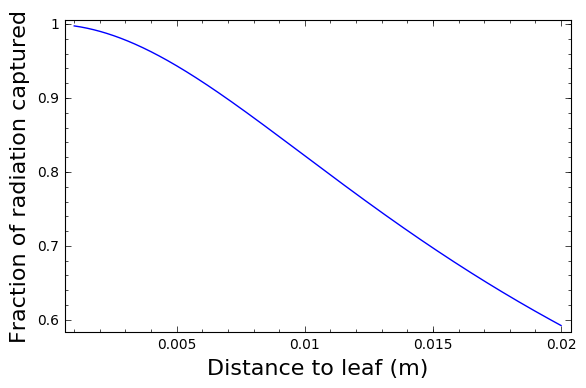

In [70]:
vdict = cdict.copy()
vdict[L_l] = 0.03
vdict[L_s] = 0.01
print eq_Fs.rhs().subs(vdict)(L_ls = 0.01)
P = plot(eq_Fs.rhs().subs(vdict), (L_ls, 0.001, 0.02))
P.axes_labels(['Distance to leaf (m)', 'Fraction of radiation captured'])
P

In [71]:
save_session('leaf_chamber_eqs.sobj')

# Table of symbols

In [72]:
# Creating dictionary to substitute names of units with shorter forms
var('m s J Pa K kg mol')
subsdict = {meter: m, second: s, joule: J, pascal: Pa, kelvin: K, kilogram: kg, mole: mol}
var('N_Re_L N_Re_c N_Le N_Nu_L N_Gr_L N_Sh_L')
dict_varnew = {Re: N_Re_L, Re_c: N_Re_c, Le: N_Le, Nu: N_Nu_L, Gr: N_Gr_L, Sh: N_Sh_L}
dict_varold = {v: k for k, v in dict_varnew.iteritems()}
variables = sorted([str(variable.subs(dict_varnew)) for variable in udict.keys()],key=str.lower)
tableheader = [('Variable', 'Description (value)', 'Units')]
tabledata = [('Variable', 'Description (value)', 'Units')]
for variable1 in variables:
    variable2 = eval(variable1).subs(dict_varold)
    variable = str(variable2)
    tabledata.append((eval(variable),docdict[eval(variable)],fun_units_formatted(variable)))

table(tabledata, header_row=True)

Variable,Description (value),Units
,Conducting area of insulation material,m
,"Fraction of one-sided leaf area covered by stomata (1 if stomata are on one side only, 2 if they are on both sides)",1
,Fraction of projected area exchanging sensible heat with the air (2),1
,Thermal diffusivity of dry air,m s
,"Leaf albedo, fraction of shortwave radiation reflected by the leaf",1
,Boundary layer thickness,m
,Specific heat of dry air (1010),J K kg
,Heat capacity of insulation material,J K kg
,Specific heat of water vapour at 300 K,J K kg
,Concentration of water in the free air,mol m
